In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier,StackingClassifier, VotingClassifier, AdaBoostClassifier



In [5]:
from google.colab import files

upload = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [6]:
df = pd.read_csv('Crop_recommendation.csv')

In [7]:
x = df.drop(df.columns[0], axis=1)
x = x.round(1)
x.sample(5)

,P,K,temperature,humidity,ph,rainfall,label
1664,24,15,20.5,93.7,7.1,111.8,orange
164,48,18,19.3,69.6,5.8,83.2,maize
1811,10,33,28.3,96.9,6.1,198.8,coconut
1273,135,199,21.8,80.5,6.4,69.4,grapes
984,27,41,20.5,92.5,5.7,110.6,pomegranate


In [8]:
print('Number of instances = ',df.shape[0])
print('Number of attributes = ',df.shape[1],"\n")
# To get then number of missing values
print(df.isna().sum())

Number of instances =  2200
Number of attributes =  8 

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


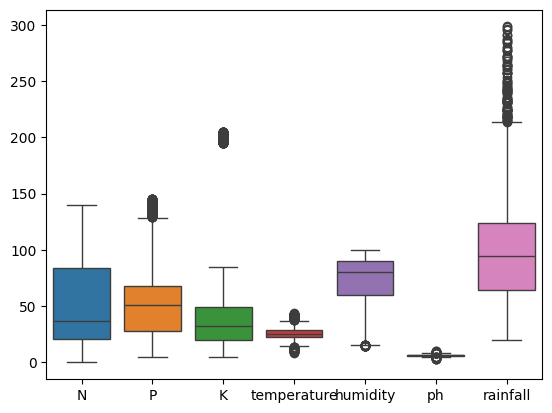

In [11]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
sns.boxplot(data=df[numeric_columns])
plt.show()

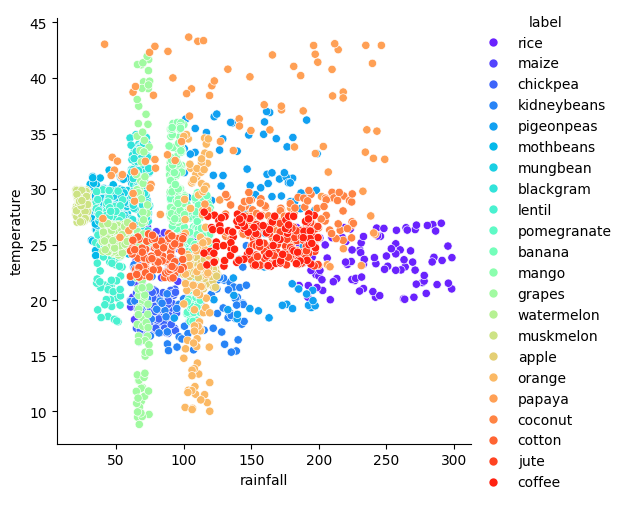

In [12]:
sns.relplot(x='rainfall',y='temperature',palette='rainbow',data=df,kind='scatter',hue='label')
plt.show()

In [13]:
crops = df['label'].unique()
print(len(crops))
print(crops)
print(pd.value_counts(df['label']))

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [14]:
df2=[]
for i in crops:
    df2.append(df[df['label'] == i])
df2[-1].head()

,N,P,K,temperature,humidity,ph,rainfall,label
2100,91,21,26,26.333780,57.364700,7.261314,191.654941,coffee
2101,107,21,26,26.452885,55.322227,7.235070,144.686134,coffee
2102,83,38,35,25.708227,52.886671,7.189156,136.732509,coffee
2103,108,24,31,24.128325,56.181077,6.431900,147.275782,coffee
2104,116,28,34,23.443723,60.395233,6.423211,122.210325,coffee


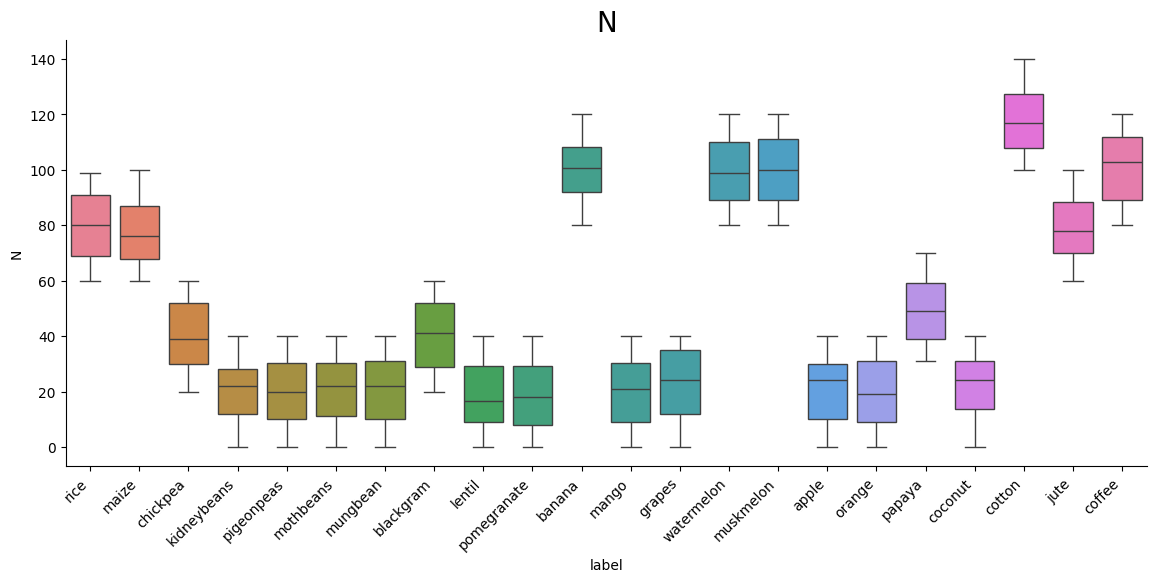

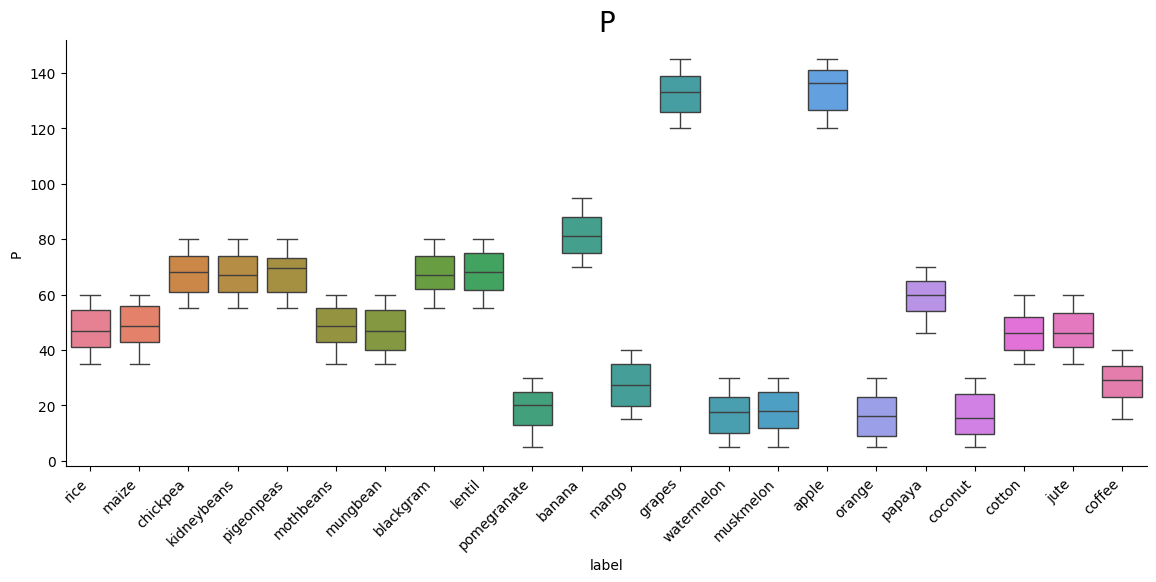

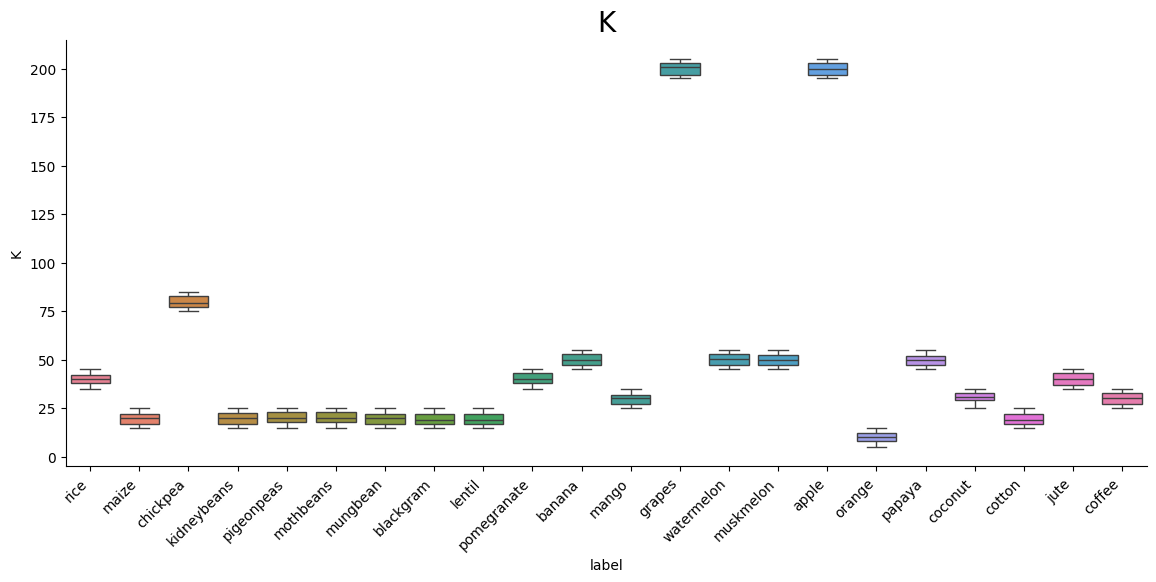

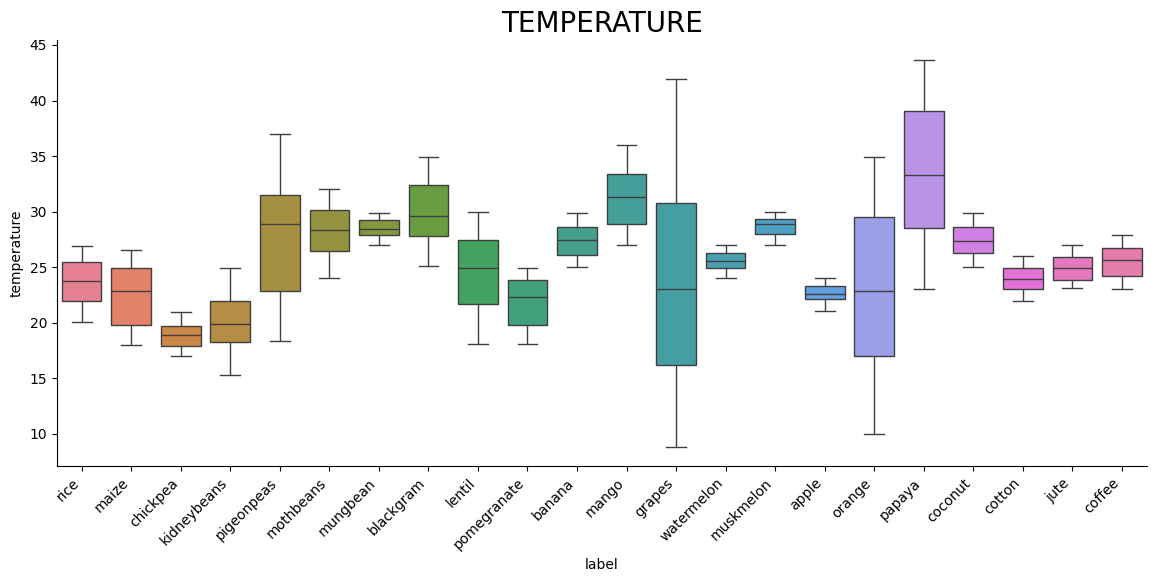

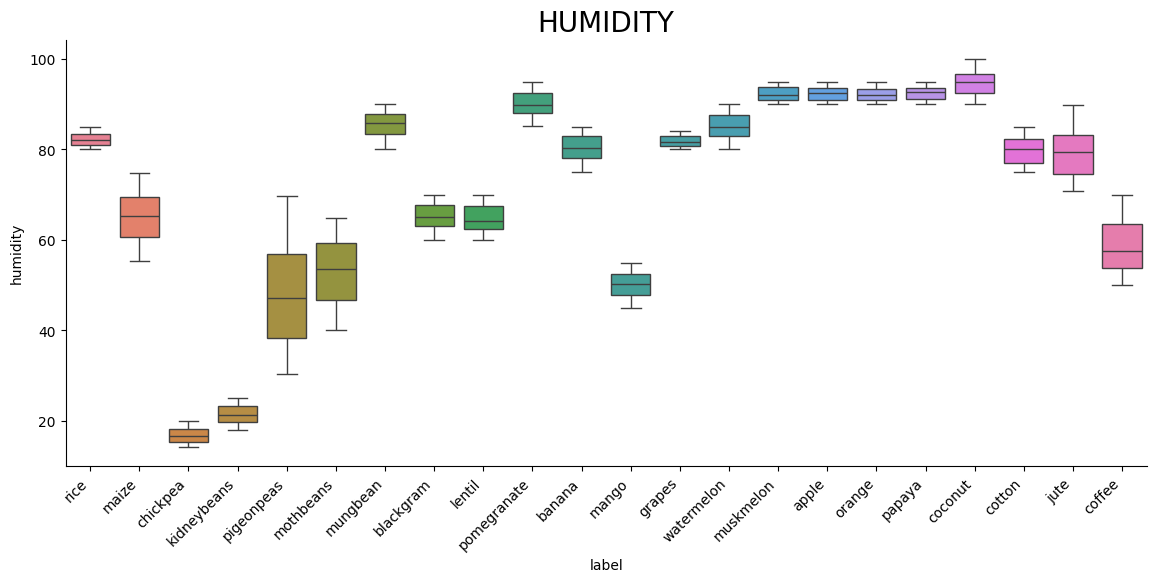

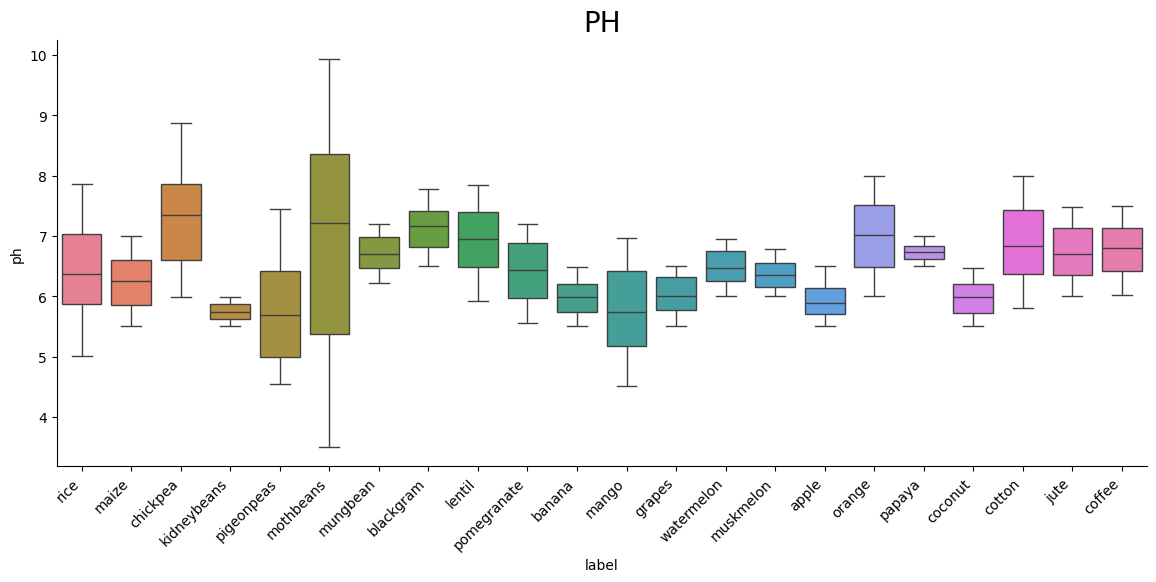

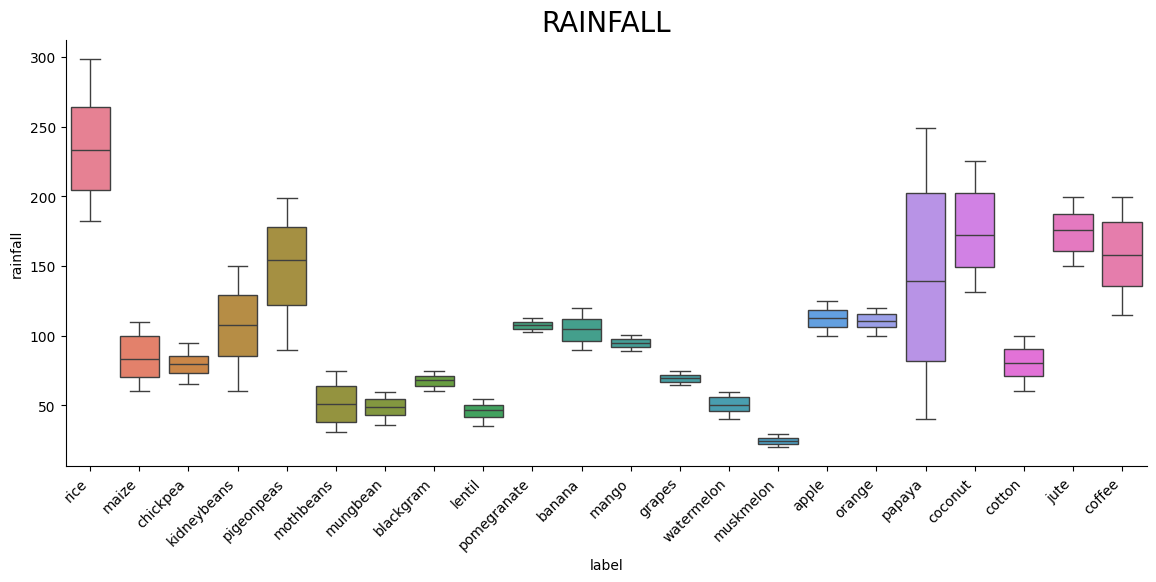

In [15]:
select = ['N', 'P','K','temperature', 'humidity', 'ph','rainfall']

for i in select:
  sns.catplot(data=df, x='label', y=i, kind='box', aspect=21/9, hue='label')
  plt.title(i.upper(), size=20)
  plt.xticks(rotation=45, ha='right')
  plt.show()

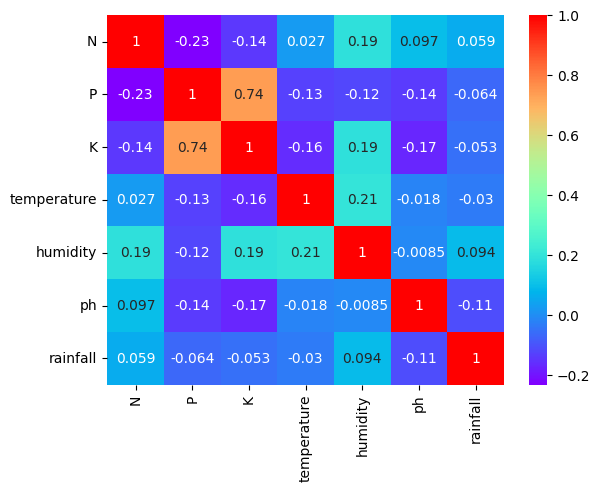

In [16]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Plot heatmap
sns.heatmap(numeric_df.corr(), cmap='rainbow', annot=True)
plt.show()


In [17]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print("---\tOutlier Detection Information\t---\n")
    print(f"Q1 (25th percentile): {q1}")
    print(f"Q3 (75th percentile): {q3}")
    print(f"IQR (Interquartile Range): {IQR}")
    print(f"Lower limit for outliers: {lower_limit}")
    print(f"Upper limit for outliers: {upper_limit}")
    print(f"Minimum value: {x.min()}")
    print(f"Maximum value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - Need to remove minimum value")
            elif lower_limit < x.min():
                print("Lower limit passed - No need to remove outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No need to remove outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - Need to remove maximum value")
detect_outlier(df['K'][df['label']=='grapes'])

---	Outlier Detection Information	---

Q1 (25th percentile): 197.0
Q3 (75th percentile): 203.0
IQR (Interquartile Range): 6.0
Lower limit for outliers: 188.0
Upper limit for outliers: 212.0
Minimum value: 195
Maximum value: 205
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier


In [18]:
for i in df['label'].unique():
    detect_outlier(df['K'][df['label']==i])
    print('---------------------------------------------\n')

---	Outlier Detection Information	---

Q1 (25th percentile): 38.0
Q3 (75th percentile): 42.0
IQR (Interquartile Range): 4.0
Lower limit for outliers: 32.0
Upper limit for outliers: 48.0
Minimum value: 35
Maximum value: 45
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------

---	Outlier Detection Information	---

Q1 (25th percentile): 17.0
Q3 (75th percentile): 22.0
IQR (Interquartile Range): 5.0
Lower limit for outliers: 9.5
Upper limit for outliers: 29.5
Minimum value: 15
Maximum value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------

---	Outlier Detection Information	---

Q1 (25th percentile): 77.0
Q3 (75th percentile): 83.0
IQR (Interquartile Range): 6.0
Lower limit for outliers: 68.0
Upper limit for outliers: 92.0
Minimum value: 75
Maximum value: 85
Lower limit passed - No need to remove outlier
Upper 

In [19]:
X = df.drop(['label'], axis=1)
Y = df['label']

encode = preprocessing.LabelEncoder()
Y = encode.fit_transform(Y)

print("Label length Y: ",len(Y))
X.head()

Label length Y:  2200


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [20]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(X,Y) #,test_size=0.3, random_state=42)

print("Length of x_train:", len(x_train))
print("Length of y_train:", len(y_train))
print("Length of x_test:", len(x_test))
print("Length of y_test:", len(y_test))

Length of x_train: 1650
Length of y_train: 1650
Length of x_test: 550
Length of y_test: 550


In [21]:
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [22]:
algorithms = {
    'decision tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'decisiontreeclassifier__criterion': ['gini', 'entropy'],
            'decisiontreeclassifier__splitter': ['best', 'random']
        }
    },
    'svm': {
        'model': SVC(),
        'params': {
            'svc__C': [1, 10, 100, 1000],
            'svc__kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'randomforestclassifier__n_estimators': [1, 5, 10]
        }
    },
    'k_classifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'kneighborsclassifier__n_neighbors': [5, 10, 20, 25],
            'kneighborsclassifier__weights': ['uniform', 'distance']
        }
    },'naive_bayes': {
        'model': GaussianNB(),
        'params': {}
    },   'linear_regression': {
        'model': LinearRegression(),
        'params': {}
    },'logistic_regression': {
        'model': LogisticRegression(),
        'params': {
            'logisticregression__penalty': ['l1', 'l2'],
            'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
        }
    }}

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time

score = []
details = []
best_param = {}

for mdl, par in algorithms.items():
    pipe = make_pipeline(preprocessing.StandardScaler(), par['model'])
    res = model_selection.GridSearchCV(pipe, par['params'], cv=5)

    start_time = time.time()  # Start time for training
    res.fit(x_train, y_train)
    end_time = time.time()    # End time for training

    # Predictions on test set for efficiency calculation
    start_pred_time = time.time()  # Start time for prediction
    y_pred = res.predict(x_test).astype(int)
    end_pred_time = time.time()    # End time for prediction

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    train_time = end_time - start_time
    test_time = end_pred_time - start_pred_time


    details_df = pd.DataFrame(res.cv_results_)
    details_df['Model name'] = mdl
    details.append(details_df)


    score.append({
        'Model name': mdl,
        'Best score': res.best_score_,
        'Best param': res.best_params_,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 score': f1,
        'Training time (s)': train_time,
        'Testing time (s)': test_time
    })

    best_param[mdl]=res.best_estimator_

details_df = pd.concat(details, ignore_index=True)

score_df = pd.DataFrame(score)



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase

In [24]:
details_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decisiontreeclassifier__criterion,param_decisiontreeclassifier__splitter,params,split0_test_score,split1_test_score,split2_test_score,...,std_test_score,rank_test_score,Model name,param_svc__C,param_svc__kernel,param_randomforestclassifier__n_estimators,param_kneighborsclassifier__n_neighbors,param_kneighborsclassifier__weights,param_logisticregression__C,param_logisticregression__penalty
0,0.011909,0.002560,0.002183,0.000190,gini,best,"{'decisiontreeclassifier__criterion': 'gini', ...",0.981818,0.990909,0.981818,...,0.005876,1,decision tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.004833,0.000359,0.001907,0.000155,gini,random,"{'decisiontreeclassifier__criterion': 'gini', ...",0.969697,0.975758,0.960606,...,0.009885,3,decision tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.012989,0.000126,0.002150,0.000068,entropy,best,{'decisiontreeclassifier__criterion': 'entropy...,0.978788,0.981818,0.963636,...,0.009506,2,decision tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.005508,0.001618,0.002418,0.000831,entropy,random,{'decisiontreeclassifier__criterion': 'entropy...,0.951515,0.972727,0.954545,...,0.009885,4,decision tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.029604,0.001917,0.020259,0.001964,NaN,NaN,"{'svc__C': 1, 'svc__kernel': 'rbf'}",0.978788,0.978788,0.981818,...,0.001212,8,svm,1,rbf,NaN,NaN,NaN,NaN,NaN


In [25]:
score_df.round(4)


,Model name,Best score,Best param,Accuracy,Precision,Recall,F1 score,Training time (s),Testing time (s)
0,decision tree,0.9842,"{'decisiontreeclassifier__criterion': 'gini', ...",0.9818,0.9824,0.9818,0.9819,0.2474,0.0019
1,svm,0.9861,"{'svc__C': 10, 'svc__kernel': 'rbf'}",0.9891,0.9907,0.9891,0.9891,1.5296,0.0337
2,random_forest,0.9897,{'randomforestclassifier__n_estimators': 10},0.9927,0.9937,0.9927,0.9928,0.4017,0.0032
3,k_classifier,0.9739,"{'kneighborsclassifier__n_neighbors': 5, 'knei...",0.9618,0.9698,0.9618,0.9623,0.7586,0.0067
4,naive_bayes,0.9939,{},0.9945,0.9951,0.9945,0.9946,0.0431,0.0020
5,linear_regression,0.2991,{},0.0582,0.0393,0.0582,0.0443,0.0865,0.0022
6,logistic_regression,0.9794,"{'logisticregression__C': 100, 'logisticregres...",0.9818,0.9829,0.9818,0.9819,2.3033,0.0018


In [26]:
score_df["Precision"]

0    0.982358
1    0.990682
2    0.993730
3    0.969762
4    0.995130
5    0.039295
6    0.982880
Name: Precision, dtype: float64

<ipython-input-27-d5d65ae67cac>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


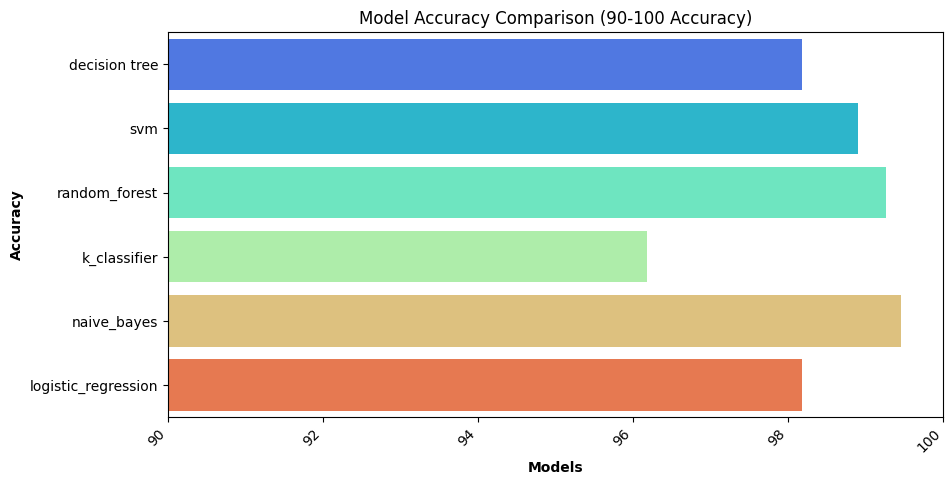

In [27]:

models = score_df['Model name']
accuracy_scores = score_df['Accuracy'] * 100

accuracy_scores_filtered = [score for score in accuracy_scores if 90 <= score <= 100]
models_filtered = [models[i] for i, score in enumerate(accuracy_scores) if 90 <= score <= 100]

# Create a bar chart
plt.figure(figsize=[10, 5], dpi=100)
plt.xlabel("Models", fontweight="bold")
plt.ylabel("Accuracy", fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.title("Model Accuracy Comparison (90-100 Accuracy)")
sns.barplot(
    x=accuracy_scores_filtered,
    y=models_filtered,
    palette="rainbow",
)

# Set x-axis limits to 80 and 100
plt.xlim(90, 100)

plt.show()

<ipython-input-28-f2499a3bc43b>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


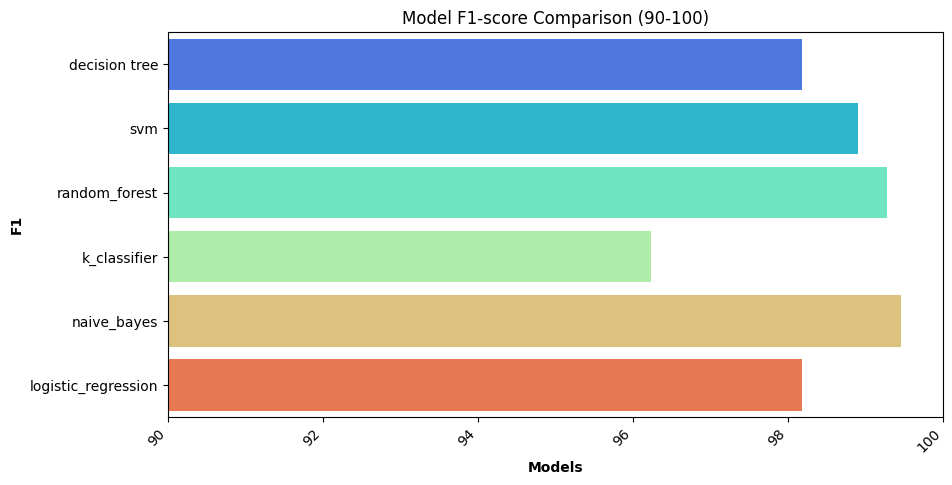

In [28]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create some sample data
models = score_df['Model name']
f1_scores =score_df['F1 score'] *100

# Filter for F1-score between 90 and 100
f1_scores_filtered = [score for score in f1_scores if 90 <= score <= 100]
models_filtered = [models[i] for i, score in enumerate(f1_scores) if 90 <= score <= 100]

# Create a bar chart
plt.figure(figsize=[10, 5], dpi=100)
plt.xlabel("Models", fontweight="bold")
plt.ylabel("F1", fontweight="bold")
plt.xticks(rotation=45, ha="right")
plt.title("Model F1-score Comparison (90-100)")
sns.barplot(
    x=f1_scores_filtered,
    y=models_filtered,
    palette="rainbow",
)

# Set x-axis limits to 90 and 100
plt.xlim(90, 100)

plt.show()

Naive Bayes has the highest accuracy and the hoghest F1 score so this algorithm has the best results use in thie project


In [31]:
base_models = [
    ('decision_tree', algorithms['decision tree']['model']),
    ('svm', algorithms['svm']['model']),
    ('random_forest', algorithms['random_forest']['model']),
    ('k_classifier', algorithms['k_classifier']['model']),
    ('naive_bayes', algorithms['naive_bayes']['model']),
    ('logistic_regression', algorithms['logistic_regression']['model'])
]

In [41]:
from sklearn.preprocessing import StandardScaler


In [91]:
# Bagging
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(x_train, y_train)
bagging_pred = bagging_model.predict(x_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)
bagging_f1 = f1_score(y_test, bagging_pred, average='weighted')
print("Bagging Accuracy:", bagging_accuracy)
print("Bagging F1 Score:", bagging_f1)

# Boosting
boosting_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
boosting_model.fit(x_train, y_train)
boosting_pred = boosting_model.predict(x_test)
boosting_accuracy = accuracy_score(y_test, boosting_pred)
boosting_f1 = f1_score(y_test, boosting_pred, average='weighted')
print("Boosting Accuracy:", boosting_accuracy)
print("Boosting F1 Score:", boosting_f1)


Bagging Accuracy: 0.9836363636363636
Bagging F1 Score: 0.9836081086208491
Boosting Accuracy: 0.98
Boosting F1 Score: 0.9799892534076122


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [90]:
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(x_train)

# Transform the test data
X_test_scaled = scaler.transform(x_test)

# Extract logistic regression model from algorithms dictionary
logistic_model = LogisticRegression(max_iter=2**63 - 1)

# Stacking
stacking_model = StackingClassifier(estimators=base_models, final_estimator=logistic_model)
stacking_model.fit(X_train_scaled, y_train)
stacking_pred = stacking_model.predict(X_test_scaled)
stacking_accuracy = accuracy_score(y_test, stacking_pred)
stacking_f1 = f1_score(y_test, stacking_pred, average='weighted')

print("Stacking Accuracy:", stacking_accuracy)
print("Stacking F1 Score:", stacking_f1)

# Blending
X_train_blend, X_blend, y_train_blend, y_blend = model_selection.train_test_split(X_train_scaled, y_train, test_size=0.5, random_state=42)
blend_models = [clf.fit(X_train_blend, y_train_blend) for _, clf in base_models]
blend_pred = np.column_stack([model.predict(X_blend) for model in blend_models])
blend_meta_model = logistic_model.fit(blend_pred, y_blend)
blend_test_pred = blend_meta_model.predict(np.column_stack([model.predict(X_test_scaled) for model in blend_models]))
blend_accuracy = accuracy_score(y_test, blend_test_pred)
blend_f1 = f1_score(y_test, blend_test_pred, average='weighted')

print("Blending Accuracy:", blend_accuracy)
print("Blending F1 Score:", blend_f1)


Stacking Accuracy: 0.9963636363636363
Stacking F1 Score: 0.9963749154071735
Blending Accuracy: 0.9127272727272727
Blending F1 Score: 0.9086009465965778


In [92]:
max_original_accuracy = max(accuracy_scores_filtered)
better_accuracy = []
ensemble_accuracy = {"Bagging":bagging_accuracy, "Boosting": boosting_accuracy, "Stacking": stacking_accuracy,"Blending": blend_accuracy}
for item in ensemble_accuracy.keys():
  if ensemble_accuracy[item]*100 > max_original_accuracy:
    better_accuracy.append((item,ensemble_accuracy[item]*100))


In [93]:
max_original_f1 = max(f1_scores_filtered)
better_f1_accuracy = []
ensemble_f1 = {"Bagging":bagging_f1, "Boosting": boosting_f1, "Stacking": stacking_f1,"Blending": blend_f1}
for item in ensemble_f1.keys():
  if ensemble_f1[item]*100 > max_original_f1:
    better_f1_accuracy.append((item,ensemble_f1[item]*100))


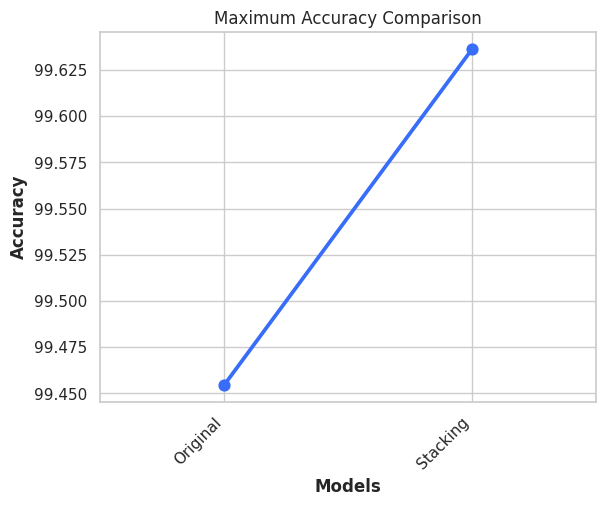

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original model
models = ['Original']

# Ensemble models with better accuracy
ensemble_models = [model for model, accuracy in better_accuracy]
models += ensemble_models

# Accuracy scores
accuracy_scores = [max_original_accuracy] + [accuracy for model, accuracy in better_accuracy]
if not better_f1_accuracy:
    print("The original had better accuracy ")
else:

  data = pd.DataFrame({'Models': models, 'Accuracy': accuracy_scores})

  # Set seaborn style and color palette
  sns.set(style="whitegrid")
  sns.set_palette("rainbow")

  # Create a pointplot
  sns.pointplot(data=data, x='Models', y='Accuracy')

  plt.xlabel("Models", fontweight="bold")
  plt.ylabel("Accuracy", fontweight="bold")
  plt.title("Maximum Accuracy Comparison")
  plt.xticks(rotation=45, ha="right")
  plt.grid(True)
  plt.show()


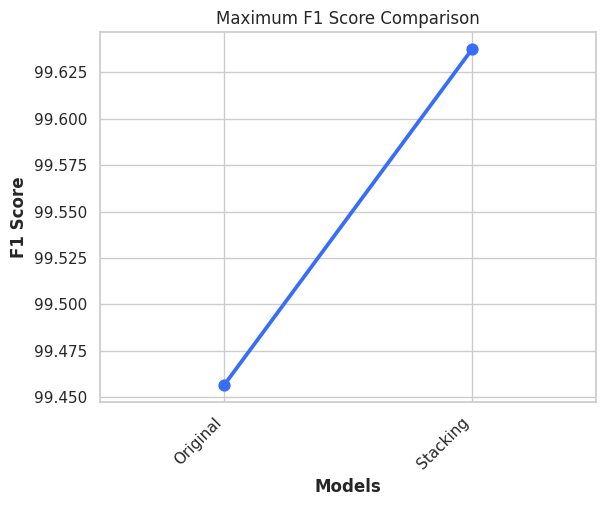

In [95]:
models_f1 = ['Original']

# Ensemble models with better F1 scores
ensemble_models_f1 = [model for model, f1_score in better_f1_accuracy]
models_f1 += ensemble_models_f1

# F1 scores
f1_scores = [max_original_f1] + [f1_score for model, f1_score in better_f1_accuracy]
if not better_f1_accuracy:
    print("The original had better f1 score than ensemble ones")
else:
  # Create a dataframe for Seaborn
  data_f1 = pd.DataFrame({'Models': models_f1, 'F1 Score': f1_scores})

  # Set seaborn style and color palette
  sns.set(style="whitegrid")
  sns.set_palette("rainbow")

  # Create a pointplot
  sns.pointplot(data=data_f1, x='Models', y='F1 Score')

  plt.xlabel("Models", fontweight="bold")
  plt.ylabel("F1 Score", fontweight="bold")
  plt.title("Maximum F1 Score Comparison")
  plt.xticks(rotation=45, ha="right")
  plt.grid(True)
  plt.show()